In [1]:
import h2o
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import dhfcorr.definitions as definitions
import glob
sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from dhfcorr.config_yaml import ConfigYaml

In [3]:
config_qa = ConfigYaml(None, default_file=definitions.ROOT_DIR+ "/config/default_qa.yaml")

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /data1/home/corre004/anaconda3/envs/alice_ml/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph525ynt6
  JVM stdout: /tmp/tmph525ynt6/h2o_corre004_started_from_python.out
  JVM stderr: /tmp/tmph525ynt6/h2o_corre004_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Amsterdam
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,1 month and 13 days
H2O cluster name:,H2O_from_python_corre004_q9imph
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [5]:
def load_models(pt_bin, config, prefix=''):
    place_saved = definitions.PROCESSING_FOLDER + config + '/ml-dataset/'
    place_saved += prefix
    main_model = h2o.load_model(place_saved + 'model_pt' + str(pt_bin) + '_main')
    cv_model_files = glob.glob(place_saved + 'model_pt' + str(pt_bin) + '_cv*')
    cv_models = [h2o.load_model(x) for x in cv_model_files]
    return main_model, cv_models 

def get_test_sample(pt_bin, config, target='CandidateType'):
    place_saved = definitions.PROCESSING_FOLDER + config + '/ml-dataset/'
    test = h2o.import_file(place_saved + 'ml_sample_test_' + str(pt_bin) + '.parquet')
    test[target] = (test[target] > -1 ).asfactor()
    return test

In [6]:
main, cv_models = load_models(3, 'D0_HMV0', 'stop_')
main

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1572017359370_1


Model Summary: 

,,number_of_trees
0,,1040.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.04108662574828193
RMSE: 0.20269836148395953
LogLoss: 0.1398950119316935
Mean Per-Class Error: 0.05499366695248775
AUC: 0.9884731340712509
pr_auc: 0.9553016876767739
Gini: 0.9769462681425019

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4811250717877884: 

,,0,1,Error,Rate
0,0,374934.0,25066.0,0.0627,(25066.0/400000.0)
1,1,17688.0,356089.0,0.0473,(17688.0/373777.0)
2,Total,392622.0,381155.0,0.0553,(42754.0/773777.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.481125,0.943367,215.0
1,max f2,0.240739,0.961968,285.0
2,max f0point5,0.704273,0.950757,148.0
3,max accuracy,0.498836,0.944768,210.0
4,max precision,0.999424,1.000000,0.0
5,max recall,0.000790,1.000000,397.0
6,max specificity,0.999424,1.000000,0.0
7,max absolute_mcc,0.481125,0.889599,215.0
8,max min_per_class_accuracy,0.521602,0.944427,203.0
9,max mean_per_class_accuracy,0.481125,0.945006,215.0



Gains/Lift Table: Avg response rate: 48.31 %, avg score: 48.31 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,9.993467e-01,2.070157,2.070157,1.000000,0.999531,1.000000,0.999531,0.020713,0.020713,107.015680,107.015680
1,,2,0.020003,9.990751e-01,2.069889,2.070023,0.999871,0.999207,0.999935,0.999369,0.020694,0.041407,106.988920,107.002306
2,,3,0.030001,9.988144e-01,2.069889,2.069978,0.999871,0.998944,0.999914,0.999228,0.020694,0.062101,106.988920,106.997845
3,,4,0.040001,9.985505e-01,2.069354,2.069822,0.999612,0.998683,0.999838,0.999091,0.020694,0.082795,106.935421,106.982239
4,,5,0.050000,9.982788e-01,2.067749,2.069408,0.998837,0.998416,0.999638,0.998956,0.020675,0.103471,106.774871,106.940770
5,,6,0.100000,9.965380e-01,2.068391,2.068899,0.999147,0.997472,0.999393,0.998214,0.103420,0.206891,106.839105,106.889938
6,,7,0.150001,9.937073e-01,2.066358,2.068052,0.998165,0.995245,0.998983,0.997224,0.103318,0.310209,106.635776,106.805217
7,,8,0.200002,9.887161e-01,2.062505,2.066665,0.996304,0.991463,0.998313,0.995784,0.103128,0.413337,106.250541,106.666545
8,,9,0.300000,9.606633e-01,2.045329,2.059553,0.988007,0.977793,0.994878,0.989787,0.204528,0.617866,104.532862,105.955333
9,,10,0.400000,8.453741e-01,1.956025,2.033671,0.944868,0.916531,0.982375,0.971473,0.195603,0.813469,95.602502,103.367117




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.04923019910155719
RMSE: 0.2218787937175547
LogLoss: 0.16422429190729834
Mean Per-Class Error: 0.06739622917876176
AUC: 0.9834238902908686
pr_auc: 0.9470557741806933
Gini: 0.9668477805817373

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45868035461388384: 

,,0,1,Error,Rate
0,0,368820.0,31180.0,0.078,(31180.0/400000.0)
1,1,21267.0,352510.0,0.0569,(21267.0/373777.0)
2,Total,390087.0,383690.0,0.0678,(52447.0/773777.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.458680,0.930760,219.0
1,max f2,0.193439,0.953056,300.0
2,max f0point5,0.750220,0.940541,130.0
3,max accuracy,0.492768,0.932450,208.0
4,max precision,0.999435,0.999223,0.0
5,max recall,0.000043,1.000000,399.0
6,max specificity,0.999435,0.999975,0.0
7,max absolute_mcc,0.489338,0.864887,209.0
8,max min_per_class_accuracy,0.512481,0.932320,202.0
9,max mean_per_class_accuracy,0.489338,0.932604,209.0



Gains/Lift Table: Avg response rate: 48.31 %, avg score: 48.26 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,9.993811e-01,2.069354,2.069354,0.999612,0.999561,0.999612,0.999561,0.020694,0.020694,106.935421,106.935421
1,,2,0.020004,9.991068e-01,2.067750,2.068552,0.998837,0.999242,0.999225,0.999401,0.020686,0.041380,106.774996,106.855193
2,,3,0.030001,9.988477e-01,2.067213,2.068106,0.998578,0.998976,0.999009,0.999260,0.020665,0.062045,106.721282,106.810573
3,,4,0.040001,9.985904e-01,2.068284,2.068150,0.999095,0.998720,0.999031,0.999125,0.020683,0.082728,106.828409,106.815032
4,,5,0.050011,9.983191e-01,2.066415,2.067803,0.998192,0.998455,0.998863,0.998991,0.020683,0.103412,106.641475,106.780296
5,,6,0.100000,9.966015e-01,2.066196,2.067000,0.998087,0.997521,0.998475,0.998256,0.103289,0.206701,106.619642,106.699985
6,,7,0.150001,9.937499e-01,2.061596,2.065198,0.995864,0.995304,0.997605,0.997272,0.103080,0.309781,106.159558,106.519843
7,,8,0.200001,9.887775e-01,2.057208,2.063201,0.993745,0.991523,0.996640,0.995835,0.102861,0.412642,105.720796,106.320081
8,,9,0.300000,9.602353e-01,2.033263,2.053222,0.982178,0.977691,0.991819,0.989787,0.203324,0.615966,103.326282,105.322157
9,,10,0.400000,8.405760e-01,1.912229,2.017973,0.923712,0.914396,0.974792,0.970939,0.191224,0.807190,91.222903,101.797332




Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9323506,6.9538807E-4,0.9328363,0.9326086,0.93252003,0.9326641,0.9311239
1,auc,0.98342687,2.866712E-4,0.98369193,0.9835938,0.98334265,0.98353845,0.9829675
2,err,0.06764942,6.9538807E-4,0.0671637,0.06739139,0.06747999,0.0673359,0.0688761
3,err_count,10469.2,119.08274,10396.0,10421.0,10454.0,10397.0,10678.0
4,f0point5,0.92413425,6.04114E-4,0.9242782,0.9232726,0.92403764,0.9249632,0.92411953
5,f1,0.93082106,8.3514064E-4,0.93119335,0.9314205,0.93094474,0.931189,0.92935777
6,f2,0.93760735,0.0018471351,0.9382127,0.9397134,0.9379559,0.93749917,0.93465567
7,lift_top_group,2.069358,0.0040366976,2.074796,2.0656426,2.0725083,2.0670013,2.066843
8,logloss,0.16422328,0.0012235234,0.16314662,0.16344841,0.16443256,0.16385362,0.16623522
9,max_per_class_error,0.076843806,0.0015009611,0.07657483,0.07932409,0.07696146,0.07585471,0.075503945



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-10-25 18:32:15,1:02:41.509,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.516945
1,,2019-10-25 18:32:18,1:02:43.691,100.0,0.255353,0.218278,0.972861,0.961185,2.067749,0.090292
2,,2019-10-25 18:32:23,1:02:49.155,200.0,0.237938,0.189689,0.978969,0.962876,2.067750,0.077425
3,,2019-10-25 18:32:33,1:02:58.740,300.0,0.228783,0.175667,0.981744,0.961699,2.069087,0.071545
4,,2019-10-25 18:32:48,1:03:14.290,400.0,0.222952,0.167161,0.983406,0.960719,2.069087,0.068175
5,,2019-10-25 18:33:10,1:03:36.301,500.0,0.218719,0.161180,0.984559,0.958965,2.069622,0.065039
6,,2019-10-25 18:33:37,1:04:03.297,600.0,0.215173,0.156268,0.985483,0.949222,2.069889,0.063030
7,,2019-10-25 18:34:10,1:04:35.715,700.0,0.212074,0.152096,0.986270,0.947909,2.069889,0.061115
8,,2019-10-25 18:34:46,1:05:12.444,800.0,0.208998,0.148031,0.987019,0.957083,2.070157,0.059106
9,,2019-10-25 18:35:28,1:05:54.153,900.0,0.206340,0.144583,0.987654,0.955671,2.070157,0.057743



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,NormDecayLengthXY,657492.500000,1.000000,0.179763
1,D0Prod,502571.031250,0.764375,0.137407
2,DCA,443657.937500,0.674773,0.121299
3,NSigmaTPCDaughter1,326900.187500,0.497192,0.089377
4,ReducedChi2,219772.515625,0.334259,0.060087
5,PtDaughter1,200727.390625,0.305292,0.054880
6,NSigmaTOFDaughters1,185398.031250,0.281977,0.050689
7,NSigmaTPCDaughter0,176027.531250,0.267726,0.048127
8,CosTs,175789.750000,0.267364,0.048062
9,NSigmaTOFDaughters0,137377.734375,0.208942,0.037560


In [7]:
test = get_test_sample(3, 'D0_HMV0')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
def compare_training_validation(main, cv_models, x_axis, y_axis, xlabel=None, ylabel=None):
    model_history = pd.concat([cv_models[i].score_history().iloc[1:] \
                               [[x_axis, 'validation_'+y_axis]] for i in range(len(cv_models))])
    
    fig, (ax_plot, ax_ratio) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]},sharex=True)
   
    
    mean_cv = model_history.groupby(x_axis).mean()['validation_'+y_axis]
    
    mean_cv.plot(label='Cross Validation', ax=ax_plot)
    
    training = main.score_history().iloc[1:].set_index(x_axis)['training_'+y_axis]
    training.plot(ax=ax_plot, label='Training')
    
    if xlabel is not None:
        ax_plot.set_xlabel(xlabel)
    else:
        ax_plot.set_xlabel(x_axis)
        
    if ylabel is not None:
        ax_plot.set_ylabel(ylabel)
    else:
        ax_plot.set_ylabel(y_axis)
    (training/mean_cv).plot(ax=ax_ratio)
    ax_ratio.set_ylabel('Train./C.V.')
    
    fig.subplots_adjust(wspace=0, hspace=0.05)
        
    ax_plot.legend()
    return (ax_plot, ax_ratio)

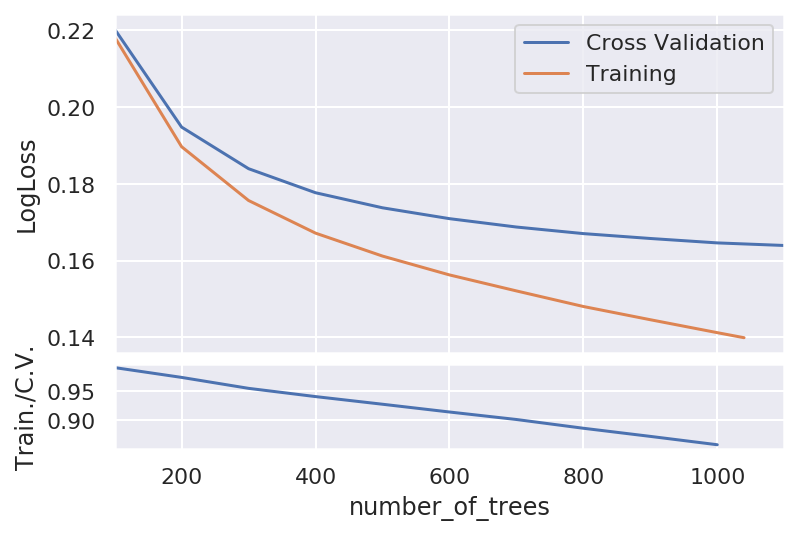

In [9]:
ax = compare_training_validation(main, cv_models, 'number_of_trees', 'logloss', 'Number of Trees', 'LogLoss')

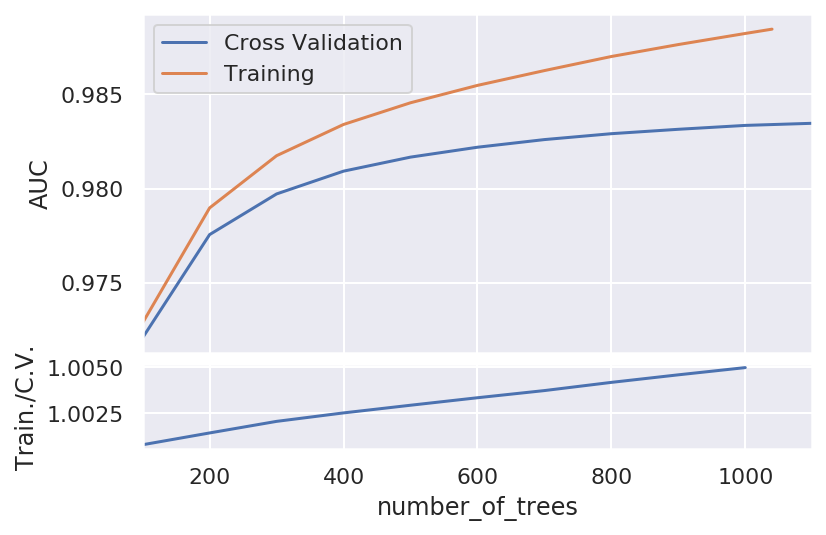

In [10]:
ax = compare_training_validation(main, cv_models, 'number_of_trees', 'auc', 'Number of Trees', 'AUC')

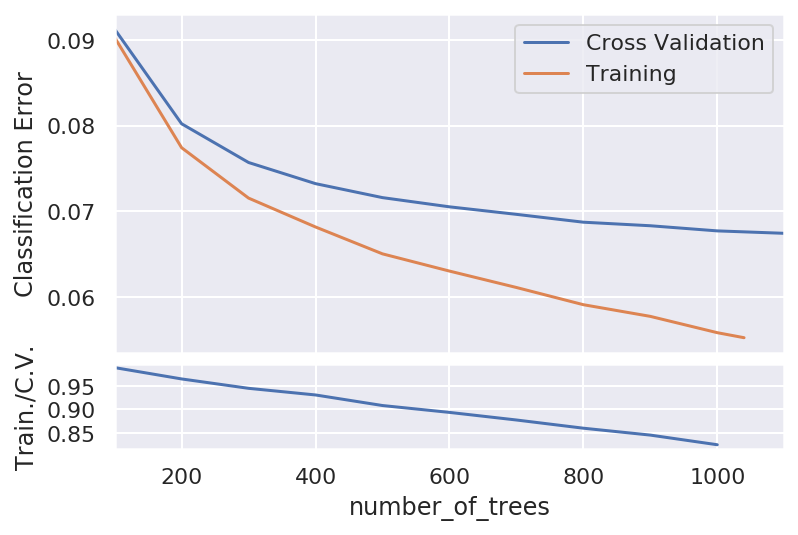

In [11]:
ax = compare_training_validation(main, cv_models, 'number_of_trees', 'classification_error', 'Number of Trees', 'Classification Error')

In [12]:
test

NormDecayLengthXY,CosP,CosPXY,ImpParXY,DCA,Normd0MeasMinusExp,PtDaughter0,PtDaughter1,ReducedChi2,D0Prod,CosTs,D0Daughter0,D0Daughter1,DecayLengthXY,NSigmaTPCDaughter0,NSigmaTOFDaughters0,NSigmaTPCDaughter1,NSigmaTOFDaughters1,DecayLength,SelectionStatusDefaultPID,InvMass,Pt,Eta,CandidateType
1.19806,0.482515,0.926192,-0.00968225,0.00746249,-1.33424,3.26275,0.377749,0.0715363,0.000180238,-0.859292,-0.00791321,-0.0227768,0.0256789,-1.89104,0.258214,-10.8667,-999,0.0480625,2,1.6028,3.55597,0.0145265,0
15.4972,0.996671,0.996954,-0.0115468,0.0114558,-2.8733,1.04829,3.18578,0.668529,-0.00257406,0.532295,-0.112609,0.0228584,0.148055,0.488431,-0.0672014,0.452653,-999,0.192617,3,1.88202,3.84814,-0.689022,1
10.2417,0.979568,0.998278,0.020515,0.0331246,3.77542,0.426689,3.60924,0.545682,-0.0210411,0.869375,-0.343435,0.0612666,0.349761,-0.698727,-999,0.486008,-0.385622,0.355124,3,1.87035,3.64454,0.0198661,1
12.5364,0.77342,0.805445,0.104661,0.024477,13.1174,3.3172,0.389787,0.960654,-0.00273818,-0.867408,0.115895,-0.0236264,0.176592,-4.50463,-999,-9.66956,-34.8142,0.220352,2,1.65443,3.58601,0.252694,0
1.36787,0.956689,0.981467,0.00816824,0.0115949,1.41329,0.571167,3.09298,0.282005,0.000128542,0.750965,0.0345832,0.0037169,0.0426245,-4.80258,-999,-3.60567,-999,0.0430357,2,1.94354,3.54976,0.376249,0
4.3416,0.948354,0.952422,-0.0126047,0.00370069,-1.72174,3.04317,0.943697,0.0578293,0.000179439,-0.611268,-0.00551253,-0.0325511,0.0413563,4.81005,-1.85427,-0.838175,-0.348557,0.0441033,0,1.65724,3.77963,0.228832,0
2.32665,0.890555,0.916515,-0.0158217,0.0200798,-4.00487,0.32911,3.66181,0.547907,0.000369491,0.968993,-0.0291962,-0.0126555,0.0395542,-0.368771,-999,-0.753039,1.03314,0.0395912,1,2.10549,3.54804,-0.193357,0
1.60143,0.983621,0.995744,0.00309318,0.00674582,0.747962,0.89897,2.65486,0.32308,-3.36459e-05,0.445804,-0.00569015,0.005913,0.0335618,-0.68988,-999,0.73135,3.54431,0.033652,2,1.55245,3.52381,-0.0829189,0
1.19719,0.801968,0.999739,0.00092009,0.0202201,0.16877,0.539618,3.53331,0.394013,-8.58096e-05,0.689535,0.0283721,-0.00302443,0.040257,-3.03118,-33.0208,-2.94788,-999,0.0461493,2,1.49075,3.93291,-0.12933,0
6.38651,0.980942,0.997594,0.0038452,0.0256676,0.411362,3.59883,0.795492,2.02757,-0.00028398,-0.826943,-0.00601127,0.0472413,0.0554599,0.987375,1.56943,-1.74453,-21.0103,0.0594408,0,2.16801,3.99734,-0.185271,0


In [11]:
pred_test = main.predict(test).as_data_frame()

xgboost prediction progress: |████████████████████████████████████████████| 100%


/nethome/corre004/anaconda3/envs/h2o_local/lib/python3.7/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset is missing column 'NormDecayLength': substituting in a column of NaN
  warnings.warn(w)


In [16]:
y_target = test['CandidateType'].as_data_frame()

In [17]:
y_target_is_d = y_target>-1

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc(target, prediction):
    roc = roc_curve(target, prediction, drop_intermediate=False)
    auc_roc = roc_auc_score(target, prediction)
    fig, ax = plt.subplots()
    ax.plot(roc[0], roc[1], label='XGBoost, AUC (test) = {:.3f}'.format(auc_roc))
    ax.legend()
    return ax

In [21]:
plot_roc(y_target_is_d, pred_test['p1'])

/nethome/corre004/anaconda3/envs/h2o_local/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
test

In [ ]:
d_mesons = (y_target['CandidateType'] == 0) | (y_target['CandidateType'] == 1)
y_true_non_prompt = y_target[d_mesons] == 0
plot_roc(~y_true_non_prompt, 1.0-prediction_non_prompt(pred_test[d_mesons]))

In [ ]:
def compare_prompt_non_prompt_eff(threshould, target, predict):
    prompt_eff = list()
    non_prompt_eff = list()
    background_eff = list()
    
    for tr in threshould:
        selected = (predict>tr) 
        eff_prompt = len(target[ (selected) & (target==1)])/len(target[target==1])
        eff_non_prompt = len(target[ (selected) & (target==0)])/len(target[target==0])
        eff_bkg = len(target[ (selected) & (target==-1)])/len(target[target==-1])
        prompt_eff.append(eff_prompt)
        non_prompt_eff.append(eff_non_prompt)
        background_eff.append(eff_bkg)
    
    perf = pd.DataFrame([threshould, prompt_eff, non_prompt_eff, background_eff]).T
    print()
    perf.columns = ['threshould', 'Prompt', 'Non Prompt', 'Background']
    perf.set_index('threshould', inplace=True)
    fig, (ax_plot, ax_ratio1, ax_ratio2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1, 1]},figsize=(5,5*1.618),sharex=True)
    
    perf.plot(ax=ax_plot)
    ax_ratio2.set_xlabel('Probability ($p>p_0$)')
    ax_plot.set_ylabel('Efficiency')
    (perf['Prompt']/perf['Non Prompt']).plot(ax=ax_ratio1, c='black')
    ax_ratio1.set_ylabel(r'$\dfrac{\mathrm{Prompt} }{ \mathrm{Non\ Prompt} }$')
    ((perf['Prompt'] + perf['Non Prompt'])/perf['Background']).plot(ax=ax_ratio2, c='black')
    ax_ratio2.set_ylabel('$\\dfrac{\mathrm{D\ meson} }{ \mathrm{Background}}$')
    fig.subplots_adjust(wspace=0, hspace=0.05)
    return ax, threshould, prompt_eff, non_prompt_eff, background_eff

In [ ]:
a = compare_prompt_non_prompt_eff(np.linspace(0.0, 1.0, 1001), 
                                     y_target['CandidateType'],(pred_test['p0']) ) 

In [ ]:
non_prompt = compare_prompt_non_prompt_eff(np.linspace(0.0, 1.0, 1001), 
                                     y_target['CandidateType'], 
                                     (1.-pred_test['p-1']) * (pred_test['p0']) ) 

In [ ]:
prompt = compare_prompt_non_prompt_eff(np.linspace(0.0, 1.0, 1001), 
                                     y_target['CandidateType'], 
                                     (1.-pred_test['p-1']) * pred_test['p1'] ) 

In [ ]:
natural = prompt = compare_prompt_non_prompt_eff(np.linspace(0.0, 1.0, 101), 
                                     y_target['CandidateType'], 
                                     (1.-pred_test['p-1'])) 

In [ ]:
perf = main.model_performance(test)
perf

In [ ]:
def plot_roc_curve(model, performance_on_test):
    auc_test = performance_on_test.auc()
    auc_train = model.auc()
    
    roc_test = performance_on_test.roc()
    roc_train = model.roc()
    
    fig, ax = plt.subplots()
    ax.plot(roc_test[0], roc_test[1], label='XGBoost, AUC (test) = {:.3f}'.format(auc_test))
    ax.plot(roc_train[0], roc_train[1], label='XGBoost, AUC (train) = {:.3f}'.format(auc_train))
    
    ax.set_xscale('log')
    ax.set_ylabel('True Positive Ratio')
    ax.set_xlabel('False Positive Ratio')
    ax.legend()
    return ax

In [ ]:
def plot_feature_importance(model, title='',
                            map_names=pd.DataFrame(config_qa.values['qa']['D0']).T['label'].to_dict()):
    variable_imp = pd.DataFrame(model.varimp(), 
                                columns=['Feature', 'Relative Importance', 
                                         'Scaled importance', 'Percentage'])

    variable_imp['Feature'] = variable_imp['Feature'].replace(map_names)
    variable_imp.set_index('Feature', inplace=True)
    variable_imp['Percentage'] = variable_imp['Percentage']*100
    variable_imp.sort_values(by='Percentage',ascending=True, inplace=True)
    sns.set()
    ax = variable_imp['Percentage'].plot.barh(figsize=(4,4*1.618))
    ax.set_ylabel('')
    ax.set_xlabel('Feature Importance (%)')
    ax.set_title(title)
    return ax

In [ ]:
plot_feature_importance(main, '16 $\less$ $p_T$ $\leqslant$ 24 GeV/c')

In [ ]:
def plot_roc_curve(model, performance_on_test):
    auc_test = performance_on_test.auc()
    auc_train = model.auc()
    
    roc_test = performance_on_test.roc()
    roc_train = model.roc()
    
    fig, ax = plt.subplots()
    ax.plot(roc_test[0], roc_test[1], label='XGBoost, AUC (test) = {:.3f}'.format(auc_test))
    ax.plot(roc_train[0], roc_train[1], label='XGBoost, AUC (train) = {:.3f}'.format(auc_train))
    
    ax.set_xscale('log')
    ax.set_ylabel('True Positive Ratio')
    ax.set_xlabel('False Positive Ratio')
    ax.legend()
    return ax